# Install PaddleOCR

In [ ]:
!pip install paddlepaddle

# PaddleOCR should be installed after installing PaddleX(paddlepaddle)
!pip install paddleocr

  Using cached httpx-0.28.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached numpy-2.3.2-cp311-cp311-macosx_14_0_arm64.whl.metadata (62 kB)
  Using cached protobuf-6.31.1-cp39-abi3-macosx_10_9_universal2.whl.metadata (593 bytes)
  Using cached pillow-11.3.0-cp311-cp311-macosx_11_0_arm64.whl.metadata (9.0 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached anyio-4.9.0-py3-none-any.whl.metadata (4.7 kB)
  Using cached certifi-2025.8.3-py3-none-any.whl.metadata (2.4 kB)
  Using cached httpcore-1.0.9-py3-none-any.whl.metadata (21 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached h11-0.16.0-py3-none-any.whl.metadata (8.3 kB)
  Using cached sniffio-1.3.1-py3-none-any.whl.metadata (3.9 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.4/95.4 MB 36.1 MB/s  0:00:02m0:00:0100:01
Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 53.1 MB/s  0:00:00
Using cached protobuf-6.31.

In [ ]:
# Try installing HPI(High Performance Inference)
!paddlex --install hpi-cpu

Looking in links: /Users/user/Projects/Five-Eyes/history/lib/python3.11/site-packages/paddlex/hpip_links.html
ERROR: Could not find a version that satisfies the requirement ultra-infer-python (from versions: none)
ERROR: No matching distribution found for ultra-infer-python
Traceback (most recent call last):
  File "/Users/user/Projects/Five-Eyes/history/bin/paddlex", line 7, in <module>
    sys.exit(console_entry())
             ^^^^^^^^^^^^^^^
  File "/Users/user/Projects/Five-Eyes/history/lib/python3.11/site-packages/paddlex/__main__.py", line 26, in console_entry
    main()
  File "/Users/user/Projects/Five-Eyes/history/lib/python3.11/site-packages/paddlex/paddlex_cli.py", line 441, in main
    install(args)
  File "/Users/user/Projects/Five-Eyes/history/lib/python3.11/site-packages/paddlex/paddlex_cli.py", line 301, in install
    _install_hpi_deps(device_type=device_type)
  File "/Users/user/Projects/Five-Eyes/history/lib/python3.11/site-packages/paddlex/paddlex_cli.py", line 261

# Install REQUIRED Packages Done

# Next, Run OCR for test

In [13]:
# Initialize PaddleOCR instance
import paddle
from paddleocr import PaddleOCR
paddle.set_flags({
    # CPU 메모리 사용률을 50%로 제한합니다. (0.0 ~ 1.0 사이 값)
    "FLAGS_fraction_of_cpu_memory_to_use": 0.5, 
    # 텐서 메모리 즉시 회수를 활성화하여 메모리 누수를 방지합니다.
    "FLAGS_eager_delete_tensor_gb": 0.0,
    "FLAGS_fast_eager_deletion_mode": True,
    "FLAGS_use_mkldnn": False,
})
try:
    # Try OCR with High-performance(hpi)
    ocr = PaddleOCR(
        lang='chinese_cht',
        text_det_limit_side_len = 1500,
        text_det_limit_type='max',
        cpu_threads = 1,
        use_doc_orientation_classify=True,
        use_doc_unwarping=False,
        use_textline_orientation=False,
        enable_mkldnn=False,
        ocr_version='PP-OCRv5',
        enable_hpi=True,
        )
except RuntimeError as E:
    # if failed, go with hpi disabled
    ocr = PaddleOCR(
        lang='chinese_cht',
        text_det_limit_side_len = 1500,
        text_det_limit_type='max',
        cpu_threads = 1,
        use_doc_orientation_classify=True,
        use_doc_unwarping=False,
        use_textline_orientation=False,
        enable_mkldnn=False,
        ocr_version='PP-OCRv5',
        enable_hpi=False,
        text_det_unclip_ratio=2.0,
        )
    
# Run OCR inference on a sample image 
result = ocr.predict(
    input="./cropped_images/태조실록_001권_총서_001a면_cropped_bin.png")

# Visualize the results and save the JSON results
for res in result:
    res.print()
    res.save_to_img("output")
    res.save_to_json("output")

Creating model: ('PP-LCNet_x1_0_doc_ori', None)
Using official model (PP-LCNet_x1_0_doc_ori), the model files will be automatically downloaded and saved in /Users/user/.paddlex/official_models.
Fetching 6 files: 100%|██████████| 6/6 [00:00<00:00, 5278.07it/s]
Creating model: ('PP-LCNet_x1_0_doc_ori', None)
Using official model (PP-LCNet_x1_0_doc_ori), the model files will be automatically downloaded and saved in /Users/user/.paddlex/official_models.
Fetching 6 files: 100%|██████████| 6/6 [00:00<00:00, 4583.94it/s]
Creating model: ('PP-OCRv5_server_det', None)
Using official model (PP-OCRv5_server_det), the model files will be automatically downloaded and saved in /Users/user/.paddlex/official_models.
Fetching 6 files: 100%|██████████| 6/6 [00:00<00:00, 5231.98it/s]
Creating model: ('PP-OCRv5_server_rec', None)
Using official model (PP-OCRv5_server_rec), the model files will be automatically downloaded and saved in /Users/user/.paddlex/official_models.
Fetching 6 files: 100%|██████████|

# Check result

In [14]:
import json
from IPython.display import display, Image, JSON
def show_ocr_result(img_path, ocr_json):
    display(Image(filename=img_path, width = 1000))
    display(JSON(ocr_json))

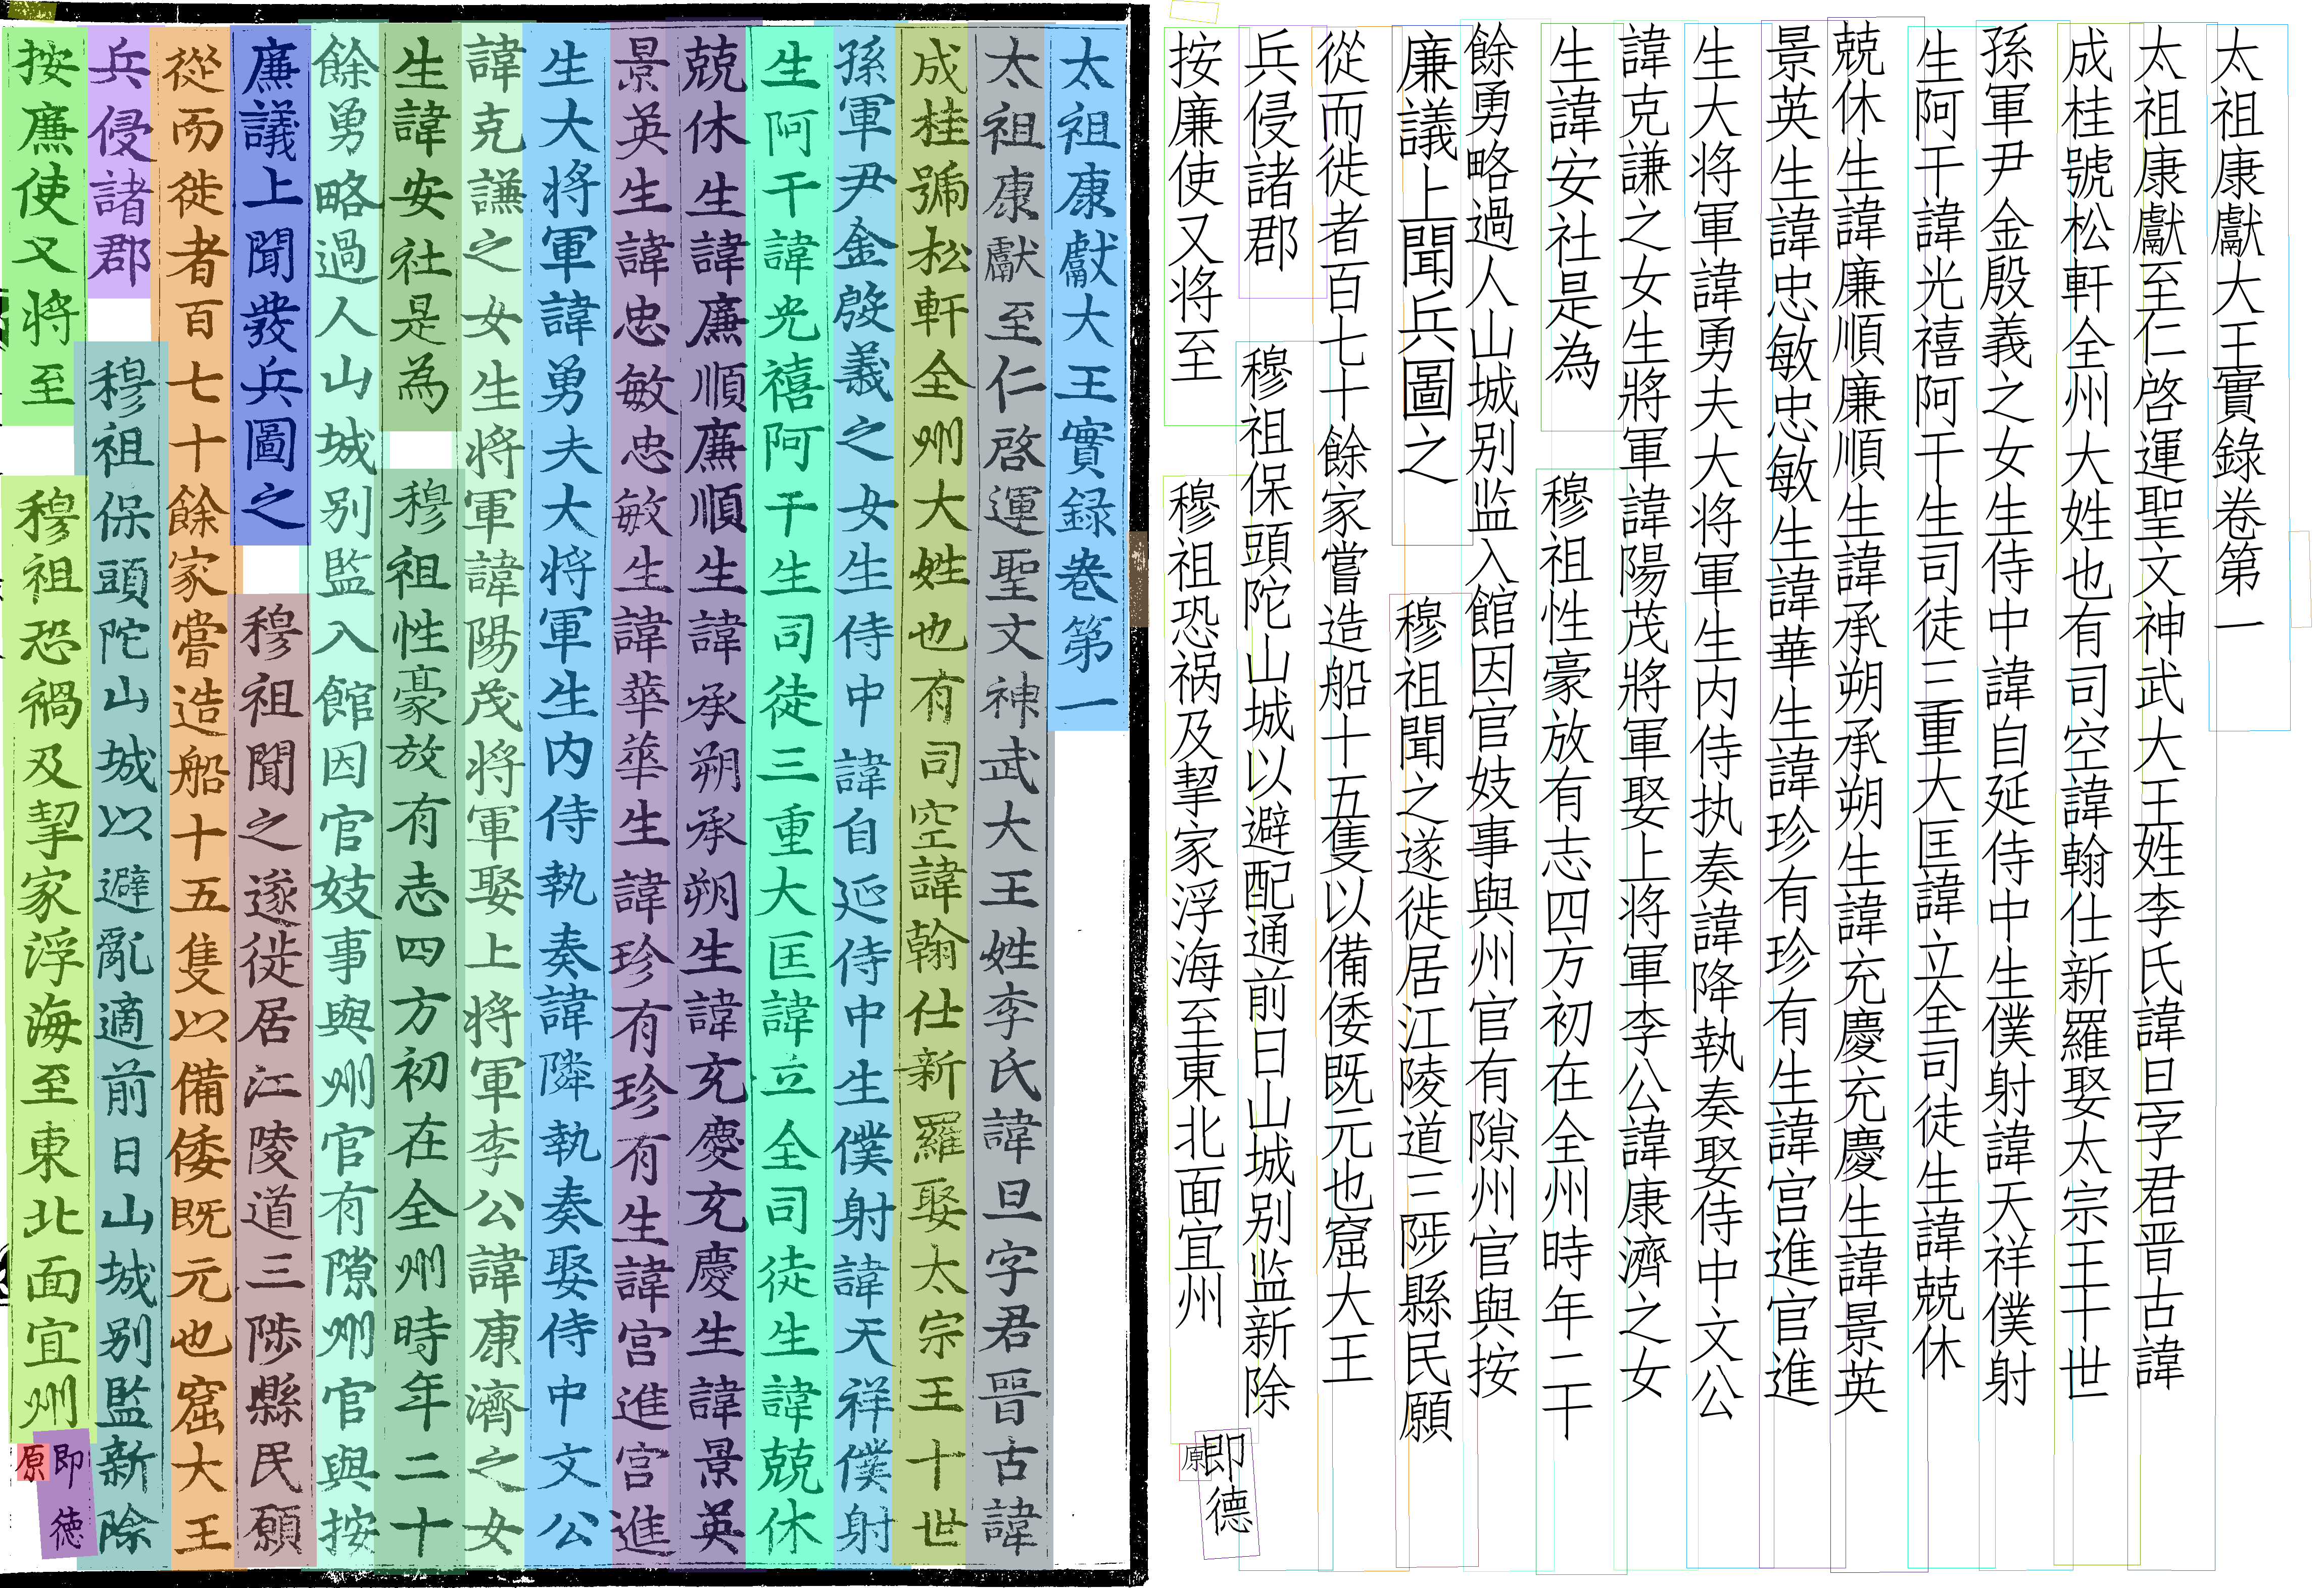

<IPython.core.display.JSON object>

In [15]:
img_path = "./output/태조실록_001권_총서_001a면_cropped_bin_ocr_res_img.png"
with open("./output/태조실록_001권_총서_001a면_cropped_bin_res.json", "r", encoding="utf-8") as f:
    ocr_json = json.load(f)

show_ocr_result(img_path, ocr_json)